# Implementation Practice.1-5
## Dataset Standardization

수업 시간에 다뤘던 것처럼 이번 Practice에서는 Dataset를 standardization했을 때 Learning에 어떤 영향을 미치는지에 대해 직접 확인해본다. standardization의 식은 다음과 같다.

<h1>
    <center>
    $\frac{x - \bar{x}}{\sigma}$
    </center>
</h1>

이 영향을 분석하기 위하여 우리는 Learning 과정 중에 $\theta_{1}, \theta_{0}$이 어떻게 학습되어 가는지를 확인하며 학습의 불안정성을 확인해본다.

먼저 Dataset을 만들어보자. 이 dataset은 normal distribution을 따르는 1000개의 data point들로 x값들이 이루어져있다. 그리고 $y = x + 1$의 식을 따라 y값을 만들어낸다. 이때 standardization이 되지 않은 상황이라고 가정하여 mean = 2, std = 3으로 만들어본다. 마지막으로 y값에는 mean=0, std=1의 residual error를 포함한다. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

np.random.seed(0)

-0.045256707490195384
0.9870331586690257


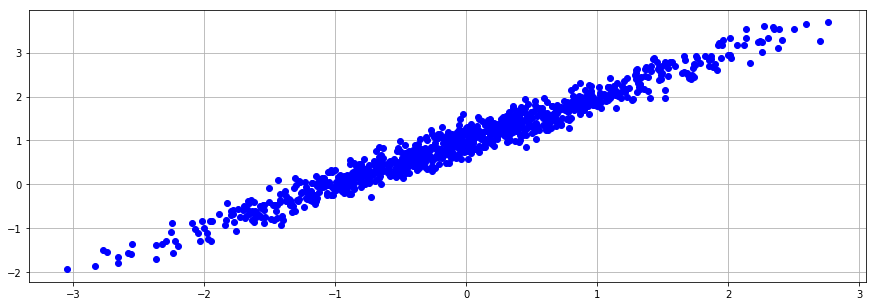

In [2]:
n_data = 1000
data_mean, data_std = 0, 1

##### Your Code(Dataset Generation/Start) #####
x_data = np.random.normal(loc=data_mean, scale=data_std, size=n_data)
print(np.mean(x_data))
print(np.std(x_data))
y_data = x_data + 0.2*np.random.normal(loc = 0, scale = 1, size = n_data) + 1
##### Your Code(Dataset Generation/End) #####

fig, ax1 = plt.subplots(figsize = (15,5))
ax1.plot(x_data, y_data, 'bo')
ax1.grid()

**Expected Output:**
<img src="./images/1_5_image1.png" width = 1000>


위의 data에서 x값들의 mean과 std를 확인해보자.


In [3]:
print(x_data.mean())
print(x_data.std())

-0.045256707490195384
0.9870331586690257


**Expected Output:** <br>
1.864229877529414 <br>
2.9610994760070772

그리고 우리는 Bias를 고정시켰을 때와 weight를 고정시켰을 때 각각 weight, bias를 변화시키며 어떤 cost function들을 가지는지 확인해보기 위해 다음과 같이 각각 bias, weight의 1-dim ndarray를 만들어보자

이는 각각 특정 w 또는 b에서의 cost를 측정하기 위해서 설정해준다.

In [4]:
ROI = [-1, 3] # Region of Interest
n_point = 30 # number of points

##### Your Code(w list Generation/Start) #####
w_range = np.linspace(start = ROI[0] ,stop = ROI[1] ,num = n_point ).reshape(-1,1)
b_range = np.linspace(start = ROI[0] ,stop = ROI[1] ,num = n_point ).reshape(-1,1)
##### Your Code(b list Generation/End) #####
    
print(w_range[:3])
print(b_range[:3])

[[-1.        ]
 [-0.86206897]
 [-0.72413793]]
[[-1.        ]
 [-0.86206897]
 [-0.72413793]]


**Expected Output:**

[[-1.        ] <br>
 [-0.86206897]<br>
 [-0.72413793]]<br>
[[-1.        ]<br>
 [-0.86206897]<br>
 [-0.72413793]]<br>

위의 w_range, b_range를 이용하여 각각 bias가 고정된 prediction1(pred1), weight가 고정된 prediction2(pred2)를 만들어보자. 이때, weight, bias는 최적의 값인 1,1로 고정한다.

## 어려움 주의!
아래의 코드에서는 numpy의 broadcasting을 적극적으로 이용하는 것이 좋다.

예를 들어 (100,1)의 ndarray와 (1, 30)의 ndarray를 더하면 각각 (100,30), (100,30)으로 expansion 시킨 후에 element-wise addition을 하여 결과는 (100, 30)으로 만들어준다.

따라서 우리는 $y = \theta_{1}*x + \theta_{0}$에서 $\theta_{0}$를 고정시켰다고 가정하면 모든 $\theta_{1}$에 대하여 각각 모든 x_data를 곱해줘야하므로 결과는 (len(w_range), len(x_data))의 형태로 나오게 되고, 이는 첫 번째 row는 w_range[0]와 모든 x_data를 곱한 array, 두 번째 row는 w_range[1]과 모든 x_data를 곱한 array와 같은 결과가 나온다.

또한 ndarray와 scalar를 연산했을 때, scalar를 ndarray의 shape으로 expansion시켜 준 후에 연산을 하는 broadcasting도 적극적으로 이용해야 한다.

따라서 numpy의 broadcasting을 적극적으로 이용하면 이 (len(w_range), len(x_data)) 형태의 matrix를 한 번에 얻을 수 있다.



In [5]:
theta1 = 1
theta0 = 1

##### Your Code(Prediction Values/Start) #####
pred1 = w_range * x_data + theta0 # bias가 고정된 prediction
pred2 = theta1 * x_data + b_range # weight가 고정된 prediction
##### Your Code(Prediction Values/Start) #####
print(pred1[0, 0:3])
print(pred2[0, 0:3])

[-0.76405235  0.59984279  0.02126202]
[ 0.76405235 -0.59984279 -0.02126202]


**Expected Output:**

[-6.29215704 -2.20047163 -3.93621395] <br>
[6.29215704 2.20047163 3.93621395]

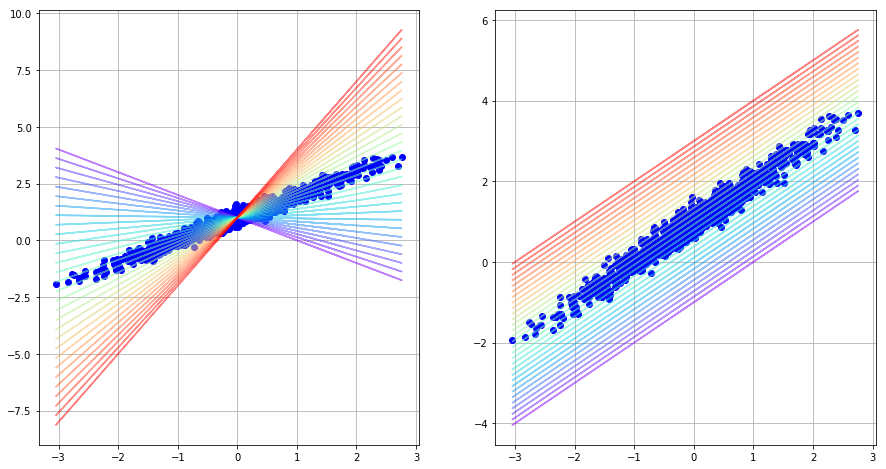

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,8))
ax1.plot(x_data, y_data, 'bo')
ax2.plot(x_data, y_data, 'bo')
ax1.grid()
ax2.grid()
cm_rainbow = cm.get_cmap('rainbow', len(pred1))
for idx, (p1, p2) in enumerate(zip(pred1, pred2)):
    ax1.plot(x_data, p1, c = cm_rainbow(idx), alpha = 0.5)
    ax2.plot(x_data, p2, c = cm_rainbow(idx), alpha = 0.5)

**Expected Output:**

<img src="./images/1_5_image2.png" width = 1000>

다음은 $\theta_{1}, \theta_{0}$에 대한 cost function들을 구하는 과정이다.

이 과정도 위와 마찬가지로 broadcasting이 이용되고, numpy의 method들의 중첩이 이루어진다.

다시 한 번 cost에 대한 식을 보면 다음과 같다.

$cost1 = \frac{1}{N} \sum_{i=1}^{N} (y_{data} - pred1)^{2}$ 

$cost2 = \frac{1}{N} \sum_{i=1}^{N} (y_{data} - pred2)^{2}$ 

위의 과정을 만들때, 팁은 ndarray.shape을 단계별로 print하며 제대로 된 차원이 나오고 있는 확인하는 것이 좋다.

In [7]:
cost1 = np.mean(np.power(pred1 - y_data.reshape(1,-1), 2), axis = 1)
cost2 = np.mean(np.power(pred2 - y_data.reshape(1,-1), 2), axis = 1)

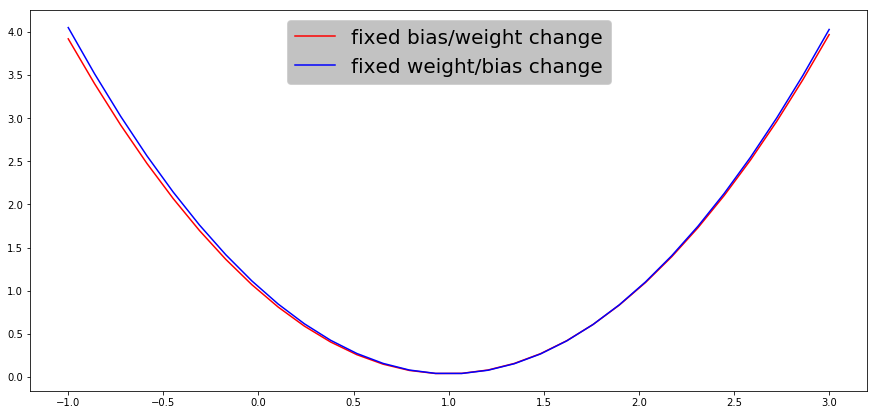

In [8]:
fig, ax1 = plt.subplots(figsize = (15,7))

ax1.plot(w_range, cost1,'r', label = 'fixed bias/weight change')
ax1.plot(b_range, cost2,'b', label = 'fixed weight/bias change')
ax1.legend(facecolor = (0.7, 0.7, 0.7), fontsize = 20, loc = 'upper center')


**Expecte Output:**

<img src="./images/1_5_image3.png" width = 1000>


이제 위의 dataset에서 x값들의 std를 1로 맞춰보고 다시 결과를 확인해보자.
그리고 std를 바꾸기 전과 결과를 비교하여 어떤 점이 달라졌는지 확인해보자.

**Expected Output:**

<img src="./images/1_5_image4.png" width = 1000>

위의 결과에서 dataset의 mean을 0으로 맞췄을 때는 어떤 결과가 나오는지 확인해보자.

**Expected Output:**

<img src="./images/1_5_image5.png" width = 1000>

다시 한 번 mean을 맞췄을 때와 그 전을 비교해보자.

**Q1)x data의 mean, std이 learning에 미치는 영향에 대해서 분석하시오**<br>
**Q2)위와 dataset이 주어졌을 때, mean, std의 허용범위를 찾아보고 그 근거를 제시하시오**<br>
**Q3)mean, std을 각각 0, 1로 조절하는 과정 중 어떤 것이 learning에 더 영향을 많이 미치는지 분석하시오**<br>

**Q1**   
x_data의 mean, std 값을 조정함에 따라 weight와 균형적인 학습에 상당한 영향을 미치는 것을 확인 가능하다  
mean = 0, std = 1 을 맞춰줬을 때가 가장 이상적으로 균형적인 학습을 이루는 모습을 확인 가능하다   
  
**Q3**  
